In [7]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

读取图片，以单通道灰度图格式

In [12]:
gray_img = cv2.imread('universe.jpg', 0)
cv2.imshow('gray',gray_img)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()  # in notebook, must call this.

显示图片数据的类型，图片大小。  
注意灰度图并不显示通道数。

In [4]:
print('type:', gray_img.dtype)
print('shape:', gray_img.shape)

type: uint8
shape: (560, 1024)


读取彩色图，裁剪

In [2]:
img = cv2.imread('universe.jpg')
cropped_img = img[0:100, 0:200]
cv2.imshow('crop', cropped_img)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()  # in notebook, must call this.

通道分离

In [ ]:
B, G, R = cv2.split(img)
for i, v in enumerate([B, G, R]):
    cv2.imshow(str(i), v)
    
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()  # in notebook, must call this.

随机改变颜色函数

In [5]:
def random_light_color(img):
    B, G, R = cv2.split(img)
    
    # brightness
    merged = []
    for channel_img in [B, G, R]:
        threshold = random.randint(-100, 100)
        
        if threshold == 0:
            pass
        elif threshold > 0:
            lim = 255 - threshold
            channel_img[channel_img > lim] = 255
            channel_img[channel_img <= lim] += threshold
            channel_img.astype(img.dtype)
            
        merged.append(channel_img)
    
    img_merged = cv2.merge(merged)
    return img_merged

In [6]:
img = cv2.imread('universe.jpg')
img_random_color = random_light_color(img)
cv2.imshow('img_random_color', img_random_color)

key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()  # in notebook, must call this.

修改图片的gamma值（gamma校正），可以增强图片亮度.  
[【OpenCV3】彩色映射——cv::applyColorMap()与cv::LUT()详解](https://blog.csdn.net/guduruyu/article/details/68925416?utm_source=blogxgwz5)

In [9]:
# 两种实现方法效果相同
def adjust_gamma1(img, gamma=1.0):
    inv_gamma = 1.0/gamma
    table = []
    for i in range(256):
        table.append(((i / 255.0) ** inv_gamma) * 255)
    table = np.array(table).astype('uint8')
    return cv2.LUT(img, table)

def adjust_gamma2(img, gamma=1.0):
    img = np.power(img/255.0, 1/gamma)
    img = img * 255
    img = img.astype('uint8')
    
    return img

img = cv2.imread('universe.jpg')
img_brighter1 = adjust_gamma1(img, gamma=2)
img_brighter2 = adjust_gamma2(img, gamma=2)

cv2.imshow('img', img)
cv2.imshow('img_brighter1', img_brighter1)
cv2.imshow('img_brighter2', img_brighter2)
key = cv2.waitKey()
if key == 27:
    cv2.destroyAllWindows()  # in notebook, must call this.

直方图 - histogram

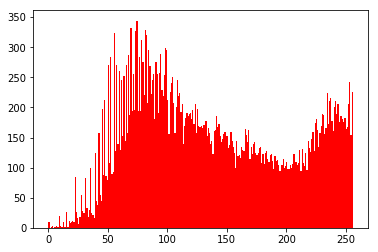

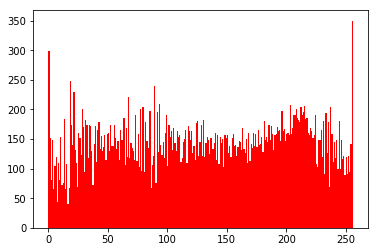

In [11]:
img_brighter_small = cv2.resize(img_brighter1,
                  (int(img_brighter1.shape[0]*0.5),
                   int(img_brighter1.shape[1]*0.5)))
plt.hist(img_brighter_small.flatten(), 256, [0, 256], color='r')
plt.show()

img_yuv = cv2.cvtColor(img_brighter_small, cv2.COLOR_BGR2YUV)
# equalize the histogram of the Y channel
img_yuv[:, :, 0] = cv2.equalizeHist(img_yuv[:, :, 0])   # only for 1 channel

# convert the YUV image back to RGB format
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

plt.hist(img_output.flatten(), 256, [0, 256], color='r')
plt.show()

cv2.imshow('Color input image', img_brighter_small)
cv2.imshow('Histogram equalized', img_output)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()  # in notebook, must call this.

旋转 - rotation

In [15]:
img = cv2.imread('universe.jpg')

# center, angle, scale
M = cv2.getRotationMatrix2D((img.shape[1]/2, img.shape[0]/2), 30, 1)
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

cv2.imshow('origin', img)
cv2.imshow('rotated 1', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)

[[  0.8660254    0.5        -25.22560734]
 [ -0.5          0.8660254   82.85675177]]


In [16]:
M[0][2] = M[1][2] = 0
print(M)
img_rotate2 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna2', img_rotate2)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

[[ 0.8660254  0.5        0.       ]
 [-0.5        0.8660254  0.       ]]


In [17]:
# scale+rotation+translation = similarity transform
M = cv2.getRotationMatrix2D(
    (img.shape[1] / 2, img.shape[0] / 2), 30, 0.5)  # center, angle, scale
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
cv2.imshow('rotated lenna', img_rotate)
key = cv2.waitKey(0)
if key == 27:
    cv2.destroyAllWindows()

print(M)

[[ 0.4330127   0.25       58.38719633]
 [-0.25        0.4330127  85.67837588]]
